In [34]:
# Here, we import all libraries 
import os
import glob
import pathlib
import pandas as pd
import numpy as np
import sys
assert sys.version_info >= (3, 7)

In [35]:
# Here, we load dataset from file and perform some pre-processing
path = glob.glob('C:\\Users\\www\\Downloads\\bbc_fulltext\\bbc\\**\\*.txt',
                 recursive = True)
pd_path = pd.DataFrame(path)
pd_path.columns = ['location']
txt_content = []
txt_category = []
txt_name = []

for i in path:
    j = pathlib.PurePath(i)
    txt_category.append(j.parent.name)
    txt_name.append(os.path.basename(i))
for root, dirs, files in os.walk('C:\\Users\\www\\Downloads\\bbc_fulltext\\bbc\\'):
    for name in dirs:
         
        for i, file in enumerate (pd_path['location']):
            text = open(pd_path['location'].iloc[i])
            r_text = text.read()
            r_text= ' '.join([word for word in r_text.split()])
            txt_content.append(r_text)

In [36]:
# Here, we use dataframe to structure our data and save to file as a csv file which can be viewed
dataset = pd.DataFrame(list(zip(txt_category, txt_name, txt_content)), columns = ["category","name","text"]) 
dataset.to_csv('C:\\Users\\www\\Downloads\\bbc_fulltext\\dataset.csv', index = False)

In [37]:
# To view the file header content
dataset.head

<bound method NDFrame.head of       category     name                                               text
0     business  001.txt  Ad sales boost Time Warner profit Quarterly pr...
1     business  002.txt  Dollar gains on Greenspan speech The dollar ha...
2     business  003.txt  Yukos unit buyer faces loan claim The owners o...
3     business  004.txt  High fuel prices hit BA's profits British Airw...
4     business  005.txt  Pernod takeover talk lifts Domecq Shares in UK...
...        ...      ...                                                ...
2019      tech  397.txt  BT program to beat dialler scams BT is introdu...
2020      tech  398.txt  Spam e-mails tempt net shoppers Computer users...
2021      tech  399.txt  Be careful how you code A new European directi...
2022      tech  400.txt  US cyber security chief resigns The man making...
2023      tech  401.txt  Losing yourself in online gaming Online role p...

[2024 rows x 3 columns]>

In [38]:
# Here, I added another column for numeric category id
#dataset_shuffle = dataset.sample(frac = 1)
dataset['category_id'] = dataset['category'].factorize()[0]
dataset

,category,name,text,category_id
0,business,001.txt,Ad sales boost Time Warner profit Quarterly pr...,0
1,business,002.txt,Dollar gains on Greenspan speech The dollar ha...,0
2,business,003.txt,Yukos unit buyer faces loan claim The owners o...,0
3,business,004.txt,High fuel prices hit BA's profits British Airw...,0
4,business,005.txt,Pernod takeover talk lifts Domecq Shares in UK...,0
...,...,...,...,...
2019,tech,397.txt,BT program to beat dialler scams BT is introdu...,4
2020,tech,398.txt,Spam e-mails tempt net shoppers Computer users...,4
2021,tech,399.txt,Be careful how you code A new European directi...,4
2022,tech,400.txt,US cyber security chief resigns The man making...,4


In [39]:
#creating a dictionary of category_id with respect to category
category_id_df = dataset[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [40]:
print(category_id_df)
print(category_to_id)
print(id_to_category)


           category  category_id
0          business            0
410   entertainment            1
796        politics            2
1213          sport            3
1623           tech            4
{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}
{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}


In [41]:
"""We should become familiar with the layout and features of our dataset before we start 
building machine learning models since these features may influence how we approach 
addressing problems.
Looking at some random instances and the quantity of examples in each class would be a 
good place to start"""

'We should become familiar with the layout and features of our dataset before we start \nbuilding machine learning models since these features may influence how we approach \naddressing problems.\nLooking at some random instances and the quantity of examples in each class would be a \ngood place to start'

In [42]:
dataset.sample(20, random_state=np.random.RandomState())

,category,name,text,category_id
1304,sport,092.txt,Collins calls for Chambers return World 100m c...,3
452,entertainment,043.txt,Stars pay tribute to actor Davis Hollywood sta...,1
569,entertainment,160.txt,iTunes now selling Band Aid song Ipod owners c...,1
242,business,243.txt,Making your office work for you Our mission to...,0
1048,politics,253.txt,Blair dismisses quit claim report Tony Blair h...,2
479,entertainment,070.txt,Children vote Shrek 2 best film Young UK film ...,1
217,business,218.txt,Absa and Barclays talks continue South Africa ...,0
1718,tech,096.txt,California sets fines for spyware The makers o...,4
1695,tech,073.txt,'Evil twin' fear for wireless net People using...,4
550,entertainment,141.txt,Police praise 'courageous' Ozzy Rock star Ozzy...,1


<AxesSubplot:xlabel='category'>

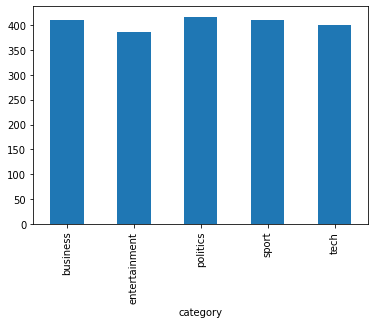

In [43]:
dataset.groupby('category').name.count().plot.bar(ylim=0)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tf_idf.fit_transform(dataset.text).toarray()
labels = dataset.category_id
print(features.shape)
print(labels.values)
print(features)

(2024, 13399)
[0 0 0 ... 4 4 4]
[[0.         0.03208279 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01452004 0.         ... 0.         0.         0.        ]]


In [45]:
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 1),
 ('politics', 2),
 ('sport', 3),
 ('tech', 4)]

In [46]:
from sklearn.feature_selection import chi2

N = 3
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tf_idf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . shares
  . Most correlated bigrams:
       . stock market
       . oil prices
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . awards
       . actor
       . film
  . Most correlated bigrams:
       . film festival
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . election
       . blair
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . chelsea
       . cup
       . coach
  . Most correlated bigrams:
       . bbc sport
       . world cup
       . champions league
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . mobile phones
       . anti virus
       . mobile phone


In [90]:
for category, category_id in sorted(category_to_id.items()):
    print(category, '\n')
    print('\n',unigrams)
    print (bigrams)

business 


 ['commodity', '350', 'tim', 'karl', 'granted', 'fraudulent', 'allowed', 'holy', 'reviews', '87', 'capped', 'view', 'spend', 'intense', 'flagship', 'definitely', 'germans', 'cuban', 'fraud', 'disquiet', 'talk', 'boosts', 'weren', 'passed', 'grabbed', 'force', 'trauma', 'societies', 'bar', 'magical', 'drawing', 'plenty', 'worries', 'bells', 'laundering', 'dropping', 'permits', 'suddenly', 'firing', 'embassy', 'struggle', '90s', 'emotional', 'alive', 'criticise', 'climbing', 'graham', '1995', 'easing', 'toughest', 'dallas', 'breaking', 'closely', 'continually', 'comparing', 'falling', 'internationally', 'habit', 'largest', 'began', 'upper', 'run', 'dominated', 'demanded', 'tickets', 'time', '1985', 'correct', 'malaysia', 'brutal', 'rachel', 'pleas', 'focus', 'earliest', 'limelight', 'disagree', 'complete', 'agents', 'teaching', 'opt', 'dealing', 'wildly', 'beautiful', 'manufacturing', 'newly', 'know', 'seen', 'le', 'surprised', 'acclaimed', 'waiting', 'order', 'faced', 'ordin

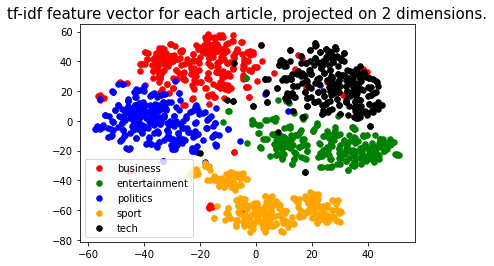

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.7)
np.random.seed(123)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=123).fit_transform(features[indices])
colors = ['red', 'green', 'blue', 'orange', 'black']
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [48]:
dataset[dataset.text.str.contains('technology')]

,category,name,text,category_id
14,business,015.txt,Air passengers win new EU rights Air passenger...,0
18,business,019.txt,India widens access to telecoms India has rais...,0
26,business,027.txt,"Steel firm 'to cut' 45,000 jobs Mittal Steel, ...",0
33,business,034.txt,"Rover deal 'may cost 2,000 jobs' Some 2,000 jo...",0
34,business,035.txt,Ad firm WPP's profits surge 15% UK advertising...,0
...,...,...,...,...
2013,tech,391.txt,Peer-to-peer nets 'here to stay' Peer-to-peer ...,4
2014,tech,392.txt,Broadband fuels online expression Fast web acc...,4
2016,tech,394.txt,TV's future down the phone line Internet TV ha...,4
2017,tech,395.txt,Cebit fever takes over Hanover Thousands of pr...,4


In [78]:
# Here, I am going to implement the model definition and evaluation 
# parameters

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [79]:
print (cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.881481
1   RandomForestClassifier         1  0.901235
2   RandomForestClassifier         2  0.854321
3   RandomForestClassifier         3  0.923457
4   RandomForestClassifier         4  0.975248
5            MultinomialNB         0  0.965432
6            MultinomialNB         1  0.962963
7            MultinomialNB         2  0.935802
8            MultinomialNB         3  0.982716
9            MultinomialNB         4  0.982673
10      LogisticRegression         0  0.965432
11      LogisticRegression         1  0.967901
12      LogisticRegression         2  0.965432
13      LogisticRegression         3  0.982716
14      LogisticRegression         4  0.990099


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

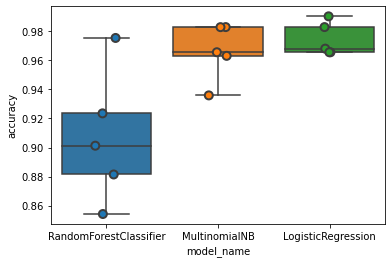

In [72]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [74]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.974316
MultinomialNB             0.965917
RandomForestClassifier    0.907148
Name: accuracy, dtype: float64

In [75]:
#Model Interpretation
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataset.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

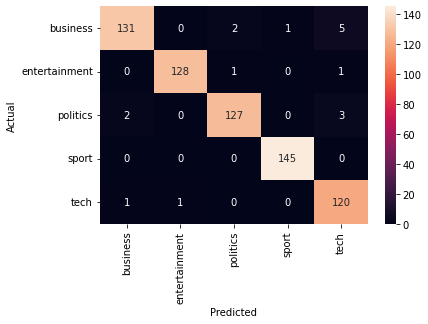

In [60]:
#To verify the performance of the Logistic Regression Model by viewing
#the confusionmatrix of the actual vs the predicted class of the text
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [61]:
# To view the cause of the misclassification especially business 
#being predicted as tech
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(dataset.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['name', 'text']])
            print('')

'politics' predicted as 'business' : 2 examples.


,name,text
933,138.txt,EU fraud clampdown urged EU member states are ...
953,158.txt,"Petrol duties frozen, Brown says Chancellor Go..."



'business' predicted as 'politics' : 2 examples.


,name,text
254,255.txt,Call to overhaul UK state pension The UK pensi...
381,382.txt,Ban on forced retirement under 65 Employers wi...



'business' predicted as 'tech' : 5 examples.


,name,text
19,020.txt,Call centre users 'lose patience' Customers tr...
251,252.txt,BT offers equal access to rivals BT has moved ...
253,254.txt,"News Corp eyes video games market News Corp, t..."
204,205.txt,Orange colour clash set for court A row over t...
210,211.txt,Electronics firms eye plasma deal Consumer ele...



'politics' predicted as 'tech' : 3 examples.


,name,text
1105,310.txt,MPs issued with Blackberry threat MPs will be ...
918,123.txt,MPs issued with Blackberry threat MPs will be ...
994,199.txt,Game warnings 'must be clearer' Violent video ...


In [68]:
model.fit(features, labels)
score1 = model.score(X_test, y_test)
print(score1)

0.9985029940119761


In [25]:
from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tf_idf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . shares
       . company
       . market
       . bank
       . firm
  . Top bigrams:
       . chief executive
       . analysts said
       . stock market
       . oil prices
       . economic growth
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . tv
       . star
  . Top bigrams:
       . box office
       . los angeles
       . new york
       . film festival
       . ticket sales
# 'politics':
  . Top unigrams:
       . labour
       . party
       . mr
       . government
       . election
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . club
       . team
       . coach
       . cup
       . game
  . Top bigrams:
       . year old
       . champions league
       . world cup
       . bbc sport
       . cross country
# 'tech':
  . Top unigrams:
       . computer
       . users
       . tec

In [26]:
dataset[dataset.text.str.lower().str.contains('bbc news')].category.value_counts()

tech             79
politics         47
entertainment    12
business          8
Name: category, dtype: int64

In [27]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tf_idf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'politics'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [28]:
texts = ["The latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily."]
text_features = tf_idf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"The latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily."
  - Predicted as: 'tech'



In [29]:
texts = ["The shot appeared to be veering wide off of Goodwin's foot, and the official scorer ultimately charged an own goal to Argentine midfielder Enzo Fernández. He had leaped up to intercept the shot and instead deflected it into his own net."]
text_features = tf_idf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"The shot appeared to be veering wide off of Goodwin's foot, and the official scorer ultimately charged an own goal to Argentine midfielder Enzo Fernández. He had leaped up to intercept the shot and instead deflected it into his own net."
  - Predicted as: 'sport'



In [30]:
texts = ["The idea of a nasty Christmas movie is nothing new, but “Violent Night” still manages to deliver the goods, mixing “Die Hard” and “Rambo”-style action with a fair amount of hokey ho-ho-hokum. David Harbour makes a particularly good cranky, butt-kicking Santa, in a movie that offers the sort of shared experience that should bring theaters some much-needed cheer."]
text_features = tf_idf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"The idea of a nasty Christmas movie is nothing new, but “Violent Night” still manages to deliver the goods, mixing “Die Hard” and “Rambo”-style action with a fair amount of hokey ho-ho-hokum. David Harbour makes a particularly good cranky, butt-kicking Santa, in a movie that offers the sort of shared experience that should bring theaters some much-needed cheer."
  - Predicted as: 'entertainment'



In [63]:
score = model.score(X_test, y_test)
print(score)

0.9745508982035929
